In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv("breast-cancer.csv")

In [3]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
le = LabelEncoder()
le.fit(df['diagnosis'])
df['diagnosis'] = le.transform(df['diagnosis'])

In [6]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(['id','diagnosis'],axis=1),
                                                 df['diagnosis'],test_size=0.10)

In [8]:
def sigmoid(x): # Sigmoid activation function : σ(x) = 1/(1+exp(-x))
    if x >= 0.0:
        return 1 / (1 + np.exp(-x))
    else:
        return np.exp(x) / (1 + np.exp(x))

def relu(x): # ReLU activation function : f(x) = max(0,x)
    return np.maximum(0, x)

def my_predict(x,weight):
    x = np.array(x)
    result = x
    for i in range(0,len(weight), 2):
        result = relu(result)
        result = np.dot(result, weight[i]) + weight[i+1]
        
    sigmoid_v = np.vectorize(sigmoid)
    result = sigmoid_v(result)

    return result.flatten()

def log_loss(y_true, y_pred): # Binary Cross Entropy Loss : log_loss(y_true,y_pre) = — (1/N) * ∑(Y_true * log(Y_pred))
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return np.mean(loss)


# Batch Gradient Descent

In [9]:
def batch_gradient_descent(x,y,epochs=10000,lr=0.01):

    try:x = np.array(x.to_numpy())
    except:x = np.array(x)

    try:y = np.array(y.to_numpy())
    except:y = np.array(y)

    w = np.random.rand(1,x.shape[1]).reshape(x.shape[1],1)
    b = np.random.rand(1)
    n = len(y)
    final_weight = np.random.rand(1,x.shape[1]).reshape(x.shape[1],1)
    previous_loss = 1000.0
    loss_log = []
    for _ in range(epochs):
        # Forward Propagation
        weight = [w,b]
        predict = my_predict(x,weight) # Y_pred = σ(X.W + b)
        loss = log_loss(y, predict) # Loss = log_loss(Y_true,Y_pred)
        loss_log.append(loss)

        # Backward Propagation
        for j in range(x.shape[1]):
            derivative_of_w = (1/n)*np.dot(np.transpose(x)[j],(predict-y)) # ∂L/∂w = (1/N) * ∑(X * (Y_pred - Y_true))
            w[j][0] = w[j][0] - lr * derivative_of_w # w = w - lr * ∂L/∂w

        b[0] = b[0] - lr * np.mean(predict-y) # b = b - lr * ∂L/∂b

        print(f'Epoche : {_}, loss : {loss}')

        #Call back
        if loss < previous_loss:
            previous_loss = loss
            final_weight = weight

    return final_weight,loss_log

In [10]:
start_time = time.time()

weight_bgd,loss_bgd = batch_gradient_descent(x_train,y_train,epochs=10000,lr=0.1)

end_time = time.time()

runtime_bgd = end_time - start_time

Epoche : 0, loss : 21.722155213933128
Epoche : 1, loss : 12.817124052798887
Epoche : 2, loss : 21.722155213933128
Epoche : 3, loss : 12.817124052798887
Epoche : 4, loss : 21.722155213933128
Epoche : 5, loss : 12.817124052798887
Epoche : 6, loss : 21.722155213933128
Epoche : 7, loss : 21.722155213933128
Epoche : 8, loss : 12.817124052798887
Epoche : 9, loss : 21.722155213933128
Epoche : 10, loss : 12.817124052798887
Epoche : 11, loss : 21.722155213933128
Epoche : 12, loss : 12.817124052798887
Epoche : 13, loss : 21.722155213933128
Epoche : 14, loss : 21.722155213933128
Epoche : 15, loss : 12.817124052798887
Epoche : 16, loss : 21.722155213933128
Epoche : 17, loss : 12.817124052798887
Epoche : 18, loss : 21.722155213933128
Epoche : 19, loss : 12.007621481043168
Epoche : 20, loss : 21.722155213933128
Epoche : 21, loss : 9.820287740374336
Epoche : 22, loss : 12.817124052798887
Epoche : 23, loss : 21.722155213933128
Epoche : 24, loss : 3.64278656032043
Epoche : 25, loss : 21.487665538276513

Epoche : 28, loss : 12.817124052798887
Epoche : 29, loss : 21.722155213933128
Epoche : 30, loss : 9.948991434195143
Epoche : 31, loss : 21.722155213933128
Epoche : 32, loss : 10.658450528116969
Epoche : 33, loss : 21.722155213933128
Epoche : 34, loss : 8.027571351044
Epoche : 35, loss : 21.722155213933128
Epoche : 36, loss : 12.547289862213647
Epoche : 37, loss : 21.722155213933128
Epoche : 38, loss : 5.801438221010116
Epoche : 39, loss : 21.722155213933128
Epoche : 40, loss : 12.817124052798887
Epoche : 41, loss : 21.722155213933128
Epoche : 42, loss : 11.265577456933759
Epoche : 43, loss : 21.722155213933128
Epoche : 44, loss : 6.956625762296339
Epoche : 45, loss : 21.722155213933128
Epoche : 46, loss : 12.682206957506267
Epoche : 47, loss : 21.722155213933128
Epoche : 48, loss : 8.499777006690234
Epoche : 49, loss : 21.722155213933128
Epoche : 50, loss : 12.007621481043168
Epoche : 51, loss : 21.722155213933128
Epoche : 52, loss : 8.036150734607096
Epoche : 53, loss : 21.72215521393

In [11]:
predict = np.where(my_predict(x_test,weight_bgd) >= 0.5, 1, 0)

/home/shukur/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/shukur/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


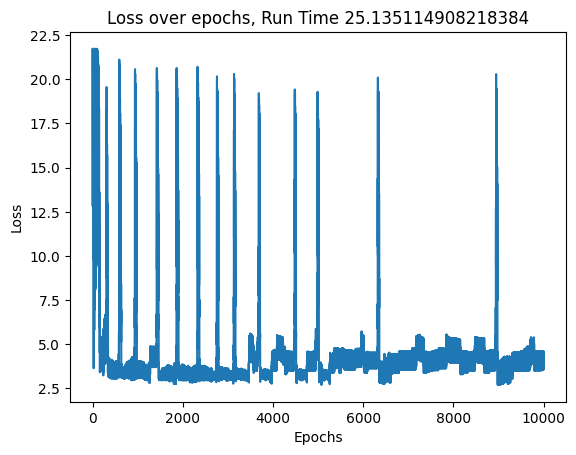

In [12]:
sns.lineplot( x=[i for i in range(len(loss_bgd))], y=loss_bgd)
plt.title(f'Loss over epochs, Run Time {runtime_bgd}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [13]:
accuracy_score(y_test, predict)

0.9649122807017544

In [14]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       1.00      0.91      0.95        22

    accuracy                           0.96        57
   macro avg       0.97      0.95      0.96        57
weighted avg       0.97      0.96      0.96        57



<Axes: >

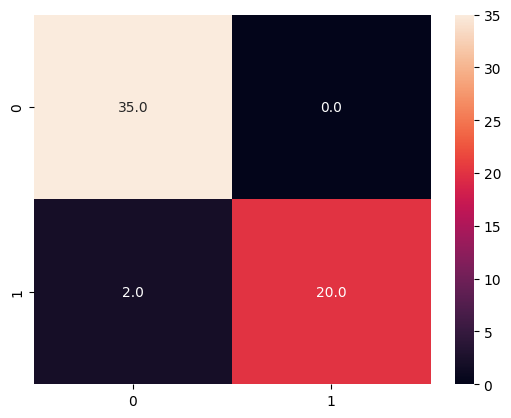

In [15]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".1f")

# Stochastic Gradient Descent

In [16]:
def stochastic_gradient_descent(x,y,epochs=10000,lr=0.01):

    try:x = np.array(x.to_numpy())
    except:x = np.array(x)

    try:y = np.array(y.to_numpy())
    except:y = np.array(y)

    w = np.random.rand(1,x.shape[1]).reshape(x.shape[1],1)
    b = np.random.rand(1)
    n = len(y)
    final_weight = np.random.rand(1,x.shape[1]).reshape(x.shape[1],1)
    previous_loss = 1000.0
    loss_log = []
    for _ in range(epochs):
        random = np.random.randint(0, x.shape[0])
        
        # Forward Propagation
        weight = [w,b]
        predict = my_predict(x[random],weight) # Y_pred = σ(X.W + b)
        loss = log_loss(y[random], predict) # Loss = log_loss(Y_true,Y_pred)
        loss_log.append(loss)

        # Backward Propagation
        for j in range(x.shape[1]):
            derivative_of_w = (1/n)*np.dot(np.transpose(x[random])[j],(predict-y[random])) # ∂L/∂w = (1/N) * ∑(X * (Y_pred - Y_true))
            w[j][0] = w[j][0] - lr * derivative_of_w # w = w - lr * ∂L/∂w

        b[0] = b[0] - lr * np.mean(predict-y[random]) # b = b - lr * ∂L/∂b

        print(f'Epoche : {_}, loss : {loss}')

        #Call back
        if loss < previous_loss:
            previous_loss = loss
            final_weight = weight

    return final_weight,loss_log

In [17]:
start_time = time.time()

weight_sgd,loss_sgd = stochastic_gradient_descent(x_train,y_train,epochs=10000,lr=0.1)

end_time = time.time()

runtime_sgd = end_time - start_time

/tmp/ipykernel_15848/1983007507.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w[j][0] = w[j][0] - lr * derivative_of_w # w = w - lr * ∂L/∂w


Epoche : 0, loss : 34.53957599234088
Epoche : 1, loss : 34.53957599234088
Epoche : 2, loss : 34.53957599234088
Epoche : 3, loss : 9.992007221626415e-16
Epoche : 4, loss : 34.53957599234088
Epoche : 5, loss : 9.992007221626415e-16
Epoche : 6, loss : 9.992007221626415e-16
Epoche : 7, loss : 34.53957599234088
Epoche : 8, loss : 34.53957599234088
Epoche : 9, loss : 34.538776394910684
Epoche : 10, loss : 9.992007221626415e-16
Epoche : 11, loss : 34.538776394910684
Epoche : 12, loss : 34.53957599234088
Epoche : 13, loss : 34.53957599234088
Epoche : 14, loss : 9.992007221626415e-16
Epoche : 15, loss : 34.53957599234088
Epoche : 16, loss : 9.992007221626415e-16
Epoche : 17, loss : 9.992007221626415e-16
Epoche : 18, loss : 34.53957599234088
Epoche : 19, loss : 9.992007221626415e-16
Epoche : 20, loss : 34.53957599234088
Epoche : 21, loss : 27.40018003179059
Epoche : 22, loss : 34.538776394910684
Epoche : 23, loss : 34.53957599234088
Epoche : 24, loss : 9.992007221626415e-16
Epoche : 25, loss : 1

In [18]:
predict = np.where(my_predict(x_test,weight_sgd) >= 0.5, 1, 0)

In [19]:
accuracy_score(y_test, predict)

1.0

/home/shukur/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/shukur/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


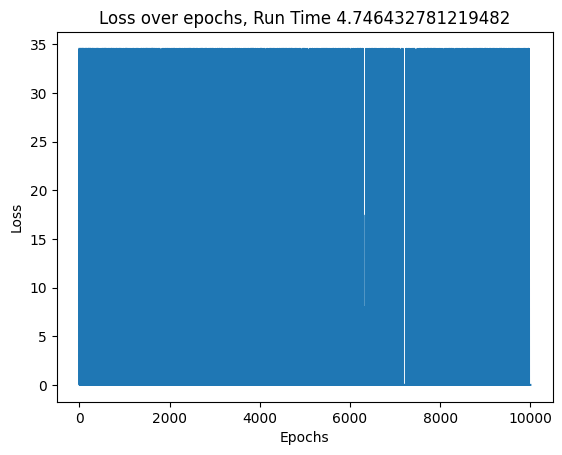

In [20]:
sns.lineplot( x=[i for i in range(len(loss_sgd))], y=loss_sgd)
plt.title(f'Loss over epochs, Run Time {runtime_sgd}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [21]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        22

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



<Axes: >

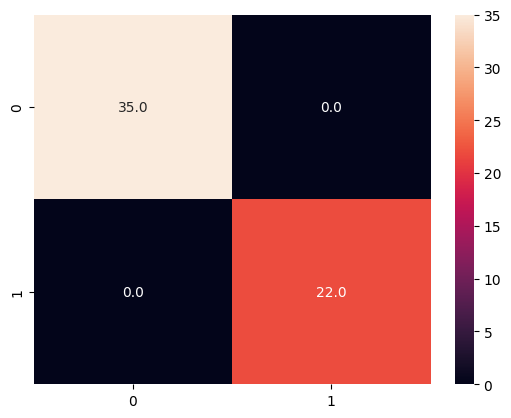

In [22]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".1f")

# Mini Batch Gradient Descent

In [23]:
def mini_atch_radient_escent(x,y,epochs=10000,lr=0.01,batch_size = 10):

    try:x = np.array(x.to_numpy())
    except:x = np.array(x)

    try:y = np.array(y.to_numpy())
    except:y = np.array(y)

    w = np.random.rand(1,x.shape[1]).reshape(x.shape[1],1)
    b = np.random.rand(1)
    n = len(y)
    final_weight = np.random.rand(1,x.shape[1]).reshape(x.shape[1],1)
    previous_loss = 1000.0
    loss_log = []
    for _ in range(epochs):
        random = np.random.randint(0, x.shape[0],batch_size)
        
        # Forward Propagation
        weight = [w,b]
        predict = my_predict(x[random],weight) # Y_pred = σ(X.W + b)
        loss = log_loss(y[random], predict) # Loss = log_loss(Y_true,Y_pred)
        loss_log.append(loss)

        # Backward Propagation
        for j in range(x.shape[1]):
            derivative_of_w = (1/n)*np.dot(np.transpose(x[random])[j],(predict-y[random])) # ∂L/∂w = (1/N) * ∑(X * (Y_pred - Y_true))
            w[j][0] = w[j][0] - lr * derivative_of_w # w = w - lr * ∂L/∂w

        b[0] = b[0] - lr * np.mean(predict-y[random]) # b = b - lr * ∂L/∂b

        print(f'Epoche : {_}, loss : {loss}')

        #Call back
        if loss < previous_loss:
            previous_loss = loss
            final_weight = weight

    return final_weight,loss_log

In [24]:
start_time = time.time()

weight_mbgd,loss_mbgd = mini_atch_radient_escent(x_train,y_train,epochs=10000,lr=0.1,batch_size=15)

end_time = time.time()

runtime_mbgd = end_time - start_time

Epoche : 0, loss : 17.26978799617044
Epoche : 1, loss : 20.72374559540453
Epoche : 2, loss : 10.361632918473205
Epoche : 3, loss : 13.815830396936352
Epoche : 4, loss : 6.700697938657134
Epoche : 5, loss : 17.26978799617044
Epoche : 6, loss : 17.269388197455342
Epoche : 7, loss : 27.631660793872705
Epoche : 8, loss : 10.361632918473205
Epoche : 9, loss : 27.631660793872705
Epoche : 10, loss : 10.361632918473205
Epoche : 11, loss : 17.26978799617044
Epoche : 12, loss : 6.907755278982137
Epoche : 13, loss : 27.631660793872705
Epoche : 14, loss : 10.361632918473205
Epoche : 15, loss : 17.26978799617044
Epoche : 16, loss : 13.815510557964274
Epoche : 17, loss : 17.26978799617044
Epoche : 18, loss : 24.177703194638617
Epoche : 19, loss : 3.4538776394910693
Epoche : 20, loss : 17.269388197455342
Epoche : 21, loss : 24.177703194638617
Epoche : 22, loss : 27.631660793872705
Epoche : 23, loss : 17.269388197455342
Epoche : 24, loss : 17.26978799617044
Epoche : 25, loss : 24.177703194638617
Epoch

In [25]:
predict = np.where(my_predict(x_test,weight_mbgd) >= 0.5, 1, 0)

In [26]:
accuracy_score(y_test, predict)

0.49122807017543857

/home/shukur/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/shukur/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


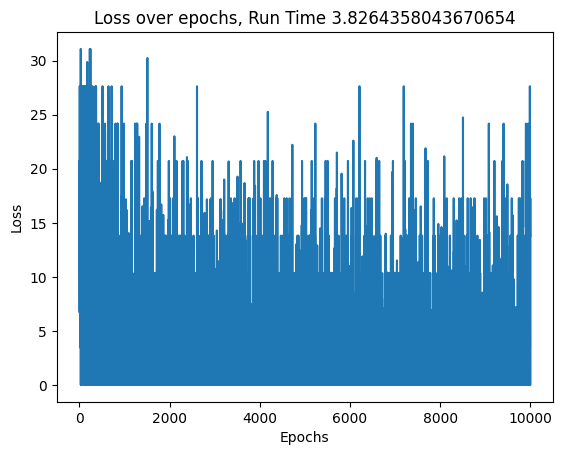

In [27]:
sns.lineplot( x=[i for i in range(len(loss_mbgd))], y=loss_mbgd)
plt.title(f'Loss over epochs, Run Time {runtime_mbgd}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [28]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29        35
           1       0.43      1.00      0.60        22

    accuracy                           0.49        57
   macro avg       0.72      0.59      0.45        57
weighted avg       0.78      0.49      0.41        57



<Axes: >

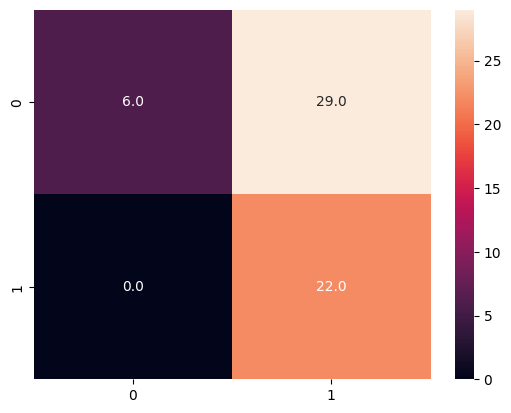

In [29]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".1f")